<a href="https://colab.research.google.com/github/ninivehelen/Projetos_Web_Scraping/blob/master/web_scraping_rottentomatoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





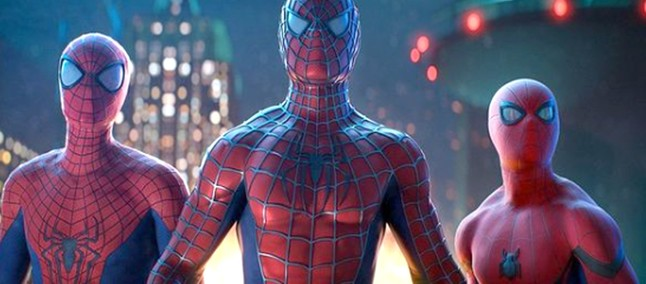




In [212]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

import csv
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 



 

In [213]:
criticas_tomatoes = []
pagina = requests.get(
    "https://www.rottentomatoes.com/m/spider_man_no_way_home/reviews")
# Requisição na pagina Inicial

content = pagina.content

site = BeautifulSoup(content, "html.parser")

for criticas in  site.findAll('div', attrs={'class':'the_review'}):
      criticas_tomatoes.append(criticas.text)



In [214]:
criticas_tomatoes

["\r\n                    Peter Parker comes of age in the MCU's best Spider-Man movie yet. No Way Home is a fun, exciting, occasionally intense love letter to Spidey fans past and present, which takes the iconic hero - & The Marvel Cinematic Universe - to some surprising places.\r\n                ",
 '\r\n                    Watts, who also helmed the previous two chapters in the series, mixes humor, action and human moments well, and he keeps the film moving nimbly, despite its nearly two-and-a-half hour running time.\r\n                ',
 '\r\n                    Undisputedly the superhero event of the year, Spider-Man: No Way Home is a breakneck collision of past and present that explores the generational legacy of Spider-Man in unrelentingly entertaining fashion.\r\n                ',
 "\r\n                    Fans of Spider-Man will LOVE what's in store for them.\r\n                ",
 "\r\n                    Holland's performance is the heart at the center that keeps all the 

In [215]:

with open('criticas_tomatoes.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(criticas_tomatoes)

In [216]:
with open('criticas_tomatoes.csv', 'r') as f:
  reader = csv.reader(f)
  reviews= list(reader)[0]

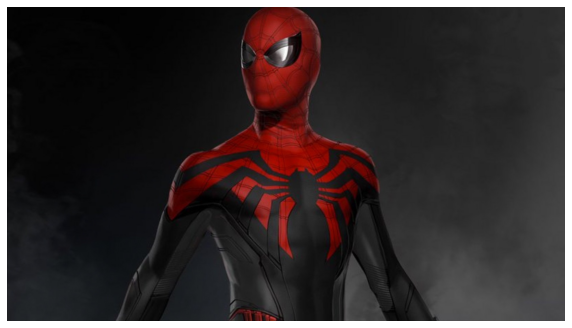

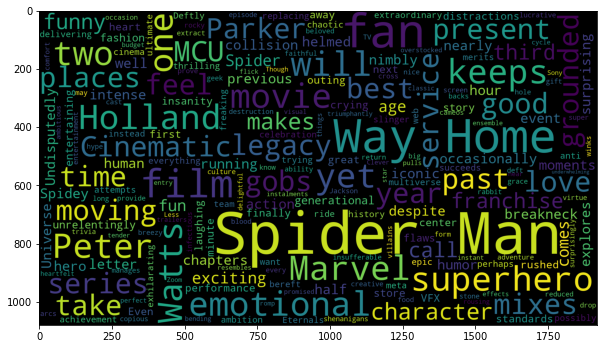

In [226]:
all_reviews = " ".join(s for s in  reviews )
stopwords = set(STOPWORDS)
stopwords.update(["there", "the", "and", "never", "of", "a", "off"])
# endereço LOCAL da SUA imagem
imagem = np.array(Image.open("/content/spyder.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=imagem, max_font_size=200,
                      min_font_size=1).generate(all_reviews)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
fig, ax2 = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
ax.imshow(imagem, interpolation='bilinear')
ax.set_axis_off()


plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")